<a href="https://colab.research.google.com/github/kerenpersis/kp/blob/main/Trading_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

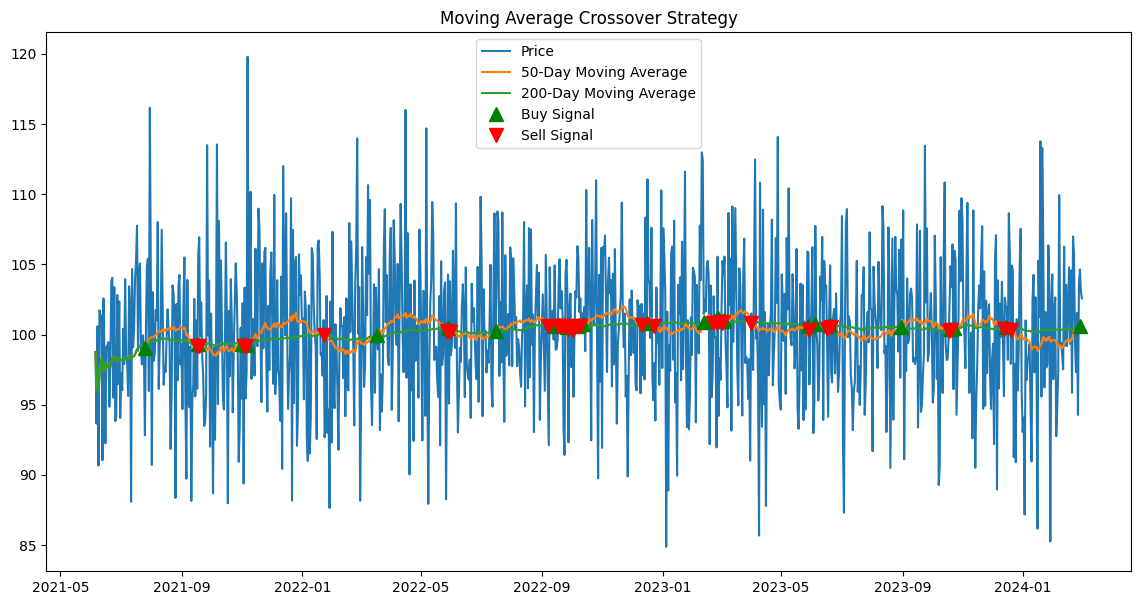

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define function to generate random price data
def generate_price_data(num_days=1000):
    dates = pd.date_range(end=pd.Timestamp.today(), periods=num_days)
    prices = np.random.normal(loc=100, scale=5, size=num_days)  # Simulated prices
    return pd.Series(prices, index=dates)

# Define function to implement moving average crossover strategy
def moving_average_crossover(prices, short_window=50, long_window=200):
    signals = pd.DataFrame(index=prices.index)
    signals['price'] = prices
    signals['short_mavg'] = prices.rolling(window=short_window, min_periods=1).mean()
    signals['long_mavg'] = prices.rolling(window=long_window, min_periods=1).mean()
    signals['signal'] = 0.0
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['positions'] = signals['signal'].diff()
    return signals

# Generate random price data
price_data = generate_price_data()

# Implement moving average crossover strategy
signals = moving_average_crossover(price_data)

# Plot price data and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(price_data, label='Price')
plt.plot(signals['short_mavg'], label='50-Day Moving Average')
plt.plot(signals['long_mavg'], label='200-Day Moving Average')
plt.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()
